<p>&nbsp;</p>
</p><h1 style="text-align: center;"><strong>Detec&ccedil;&atilde;o automatizada de Fake News</strong></h1>
<h1 style="text-align: center;"><strong>e o problema da linguagem ofensiva</strong></h1>
<h1 style="text-align: center;"><strong>e &oacute;dio</strong></h1>
<p>&nbsp;</p><p>&nbsp;</p>

</p><h4 style="text-align: center;"><strong>Proposta de Tema para Trabalho de Conclusão do Curso de Especialização em Ciência de Dados.</strong></h4>

</p><h3 style="text-align: center;"><strong>Faculdade de Engenharia de Sorocaba</strong></h3>

Proposto por:

Alex Cozer Abrantes RA:183150

Bruno Alves Comitre RA:183141

***

# Glossário

<ul>
    <li><a href='#analise_exploratoria'>1. Análise Explorátoria</a></li>
    <ul>
        <li><a href='#imports'>1.1 Imports</a></li>
        <li><a href='#leitura_dataset'>1.2 Leitura do Dataset</a></li>
        <li><a href='#classificacao_features'>1.3 Classificação das Features</a></li>
        <li><a href='#dicionario_dados'>1.4 Dicionário dos Dados</a></li>
        <li><a href='#analise_dados'>1.5 Análise dos Dados</a></li>
        <li><a href='#dados_faltantes'>1.6 Dados Faltantes</a></li>
        <li><a href='#dados_desiquilibrados'>1.7 Dados Desiquilibrados e Random Shuffle</a></li>
        <li><a href='#novas_features'>1.8 Novos Recursos (Features)</a></li>
        <ul>
            <li><a href='#recursos_palavras'>Recursos por Palavras (Tokens)</a></li>               
        </ul>
        <li><a href='#analise_grafica'>1.9 Análise Gráfica</a></li>
        <ul>
            <li><a href='#wordcloud'>1.9.1 WordCloud</a></li>
            <li><a href='#histograma'>1.9.2 Histograma</a></li>
            <ul>
                <li><a href='#histo_titulo'>1.9.2.1 Histograma dos Títulos</a></li>
                <li><a href='#histo_texto'>1.9.2.2 Histograma dos Textos</a></li>
            </ul>
            <li><a href='#boxplot'>1.9.3 Diagrama de Caixa</a></li>
            <ul>
                <li><a href='#boxplot_titulo'>1.9.3.1 Diagrama de Caixa dos Títulos</a></li>
                <li><a href='#boxplot_texto'>1.9.3.2 Diagrama de Caixa dos Textos</a></li>
            </ul>
            <li><a href='#matriz_correlacao'>1.9.5 Matriz de correlação</a></li>
        </ul>
    </ul>
</ul>

<a id='analise_exploratoria'></a>
# 1. Análise Explorátoria:

Nesta fase do trabalho, inicialmente, faz necessário a aplicação de técnicas para manusear valores faltantes e fazer transformações de variáveis. Os dados serão ajustados e estreitando os presupostos para empregar técnicas gráficas e quantitativas, visando maximizar a obtenção de informações, tendências e detectação decomportamentos.

<a id='imports'></a>
## 1.1 Imports

In [109]:
!pip install names

import numpy as np
import pandas as pd
import csv
import random 
import pandas_profiling #conda install -c conda-forge pandas-profiling
import names #pip install names
import nltk
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import seaborn as sns
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import TweetTokenizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from pandas.io.json import json_normalize
from plotly import tools
from tqdm import tqdm


nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

<a id='leitura_dataset'></a>
## 1.2 Leitura do Dataset

In [110]:
# Train Dataset
## arquivo disponivel em: https://drive.google.com/drive/folders/1LqNzxY8l0EgznlCD-g873VD-ys1BRN2-?fbclid=IwAR3PPLu4hgNdKfQDJzrLGwV6L42Vm3xBrrcquuCOR4ySS97bVvU46JDaR2s
train_data = pd.read_csv('../input/train.csv')
train_data = train_data.sample(frac = 1) # Randomly Smaple data, ratio is 100%
train_data.head()

,id,title,author,text,label
14055,14055,AMAZING VIDEO : Hispanics for Trump in Miami S...,Amy Moreno,AMAZING VIDEO : Hispanics for Trump in Miami S...,1
15298,15298,"Move over, Mika: Joe Scarborough Is Obsessed w...",Joel B. Pollak,MSNBC’s Morning Joe host Joe Scarborough and ...,0
2976,2976,VIDEO : Rudy Giuliani “POLICE AND FBI KNOW CLI...,NaN,VIDEO : Rudy Giuliani “POLICE AND FBI KNOW CLI...,1
6470,6470,CNN IS OFFICIALLY RIGGING THE ELECTION FOR CLI...,Andrew Meyer,We Are Change \nIn this video Luke Rudkowski c...,1
574,574,"On ‘S.N.L.,’ Donald Trump Botches His ‘Indepen...",Dave Itzkoff,"Sure, “Saturday Night Live” has offered ample ...",0


<a id='classificacao_features'></a>
## 1.3 Classificação das Features

In [111]:
table = [["id","Nominal Qualitativo"],["title","Nominal Qualitativo"],
         ["author","Nominal Qualitativo"],["text","Nominal Qualitativo"],
         ["label","Quantitativo Discreto"]]

filing = pd.DataFrame(table, columns=["Variável", "Classificação"])
filing

,Variável,Classificação
0,id,Nominal Qualitativo
1,title,Nominal Qualitativo
2,author,Nominal Qualitativo
3,text,Nominal Qualitativo
4,label,Quantitativo Discreto


<a id='dicionario_dados'></a>
## 1.4 Dicionário dos dados

O Dataset "fake news" contém as seguintes informações:


- **ID:** id único da notícia


- **TITLE:** título da notícia


- **AUTHOR:** autor da notícia


- **TEXT:** texto da notícia


- **LABEL:** rótulo que marca se a notícia é potencialmente não confiável
 - 1: não confiável
 - 0: confiável

<a id='analise_dados'></a>
## 1.5 Análise dos dados

Ao importar os dados, é importante entender e identificar o intervalo de preditores específicos, identificar o tipo de dados de cada preditor, bem como calcular o número ou a porcentagem de valores omissos para cada preditor. Usaremos a biblioteca pandas_profiling, que fornece muitas funções extremamente úteis para a análise exploratória de dados.

Observação: Foi retitado para demonstração a aleatoriedade dos dados

In [112]:
train_data_profiling = pd.read_csv('../input/train.csv')

In [113]:
profile = pandas_profiling.ProfileReport(train_data_profiling)
display(profile)

<a id='dados_faltantes'></a>
## 1.6 Dados Faltantes

A falta de dados pode afetar a análise e o treinamento, que poderá levar a falhas no aprendizado. Então, é possível dizer se há dados ausentes no conjunto de dados? Sim, pelo relatório gerado por pandas_profiting, identificou-se:

O título do atributo tem 558 amostras (2,68%) com valores ausentes.
O autor do atributo possui 1957 amostras (9,41%) com valores ausentes.
O texto do atributo tem 39 amostras (0,19%) com valores ausentes.

Como existe dados faltantes nas 3 features do dataset (title, Author e Text) eliminar as linhas em que há dados ausentes neste caso é a melhor opção para não comprometer a análise e o treimento.

In [114]:
print('Antes do dropna tínhamos {} registros'.format(train_data.shape[0]))
train_data.dropna(inplace=True)
print('Depois do dropna temos {} registro'.format(train_data.shape[0]))

Antes do dropna tínhamos 20800 registros
Depois do dropna temos 18285 registro


<a id='dados_desiquilibrados'></a>
## 1.7 Dados Desiquilibrados e Random Shuflle

Após eliminar as linhas de dados faltantes, aplicou-se uma análise descritiva para verificar se houve desequilíbrio nos dados, constatou-se que a média de 43% da feature Label, na qual armazena valores de 0 ou 1 (não confiáveis e confiáveis) mostra que os dados estão em desequilibrio, constando uma diferença de 2437 registros com o valor 1 (confiáveis) a mais que o valor 0 (não confiáveis). Para manter o conjunto de dados equilibrado aplicou-se o Random Shuffle nos registros com valor 1 (confiáveis) considerando o valor de 7924 registros que é o número total de dados (não confiáveis). 

In [115]:
train_data.label.describe()

count    18285.000000
mean         0.433361
std          0.495553
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: label, dtype: float64

In [116]:
unreliable = train_data[train_data['label'] == 1]
print('Não confiável：', len(unreliable))

reliable = train_data[train_data['label'] == 0]
print('Confiável：', len(reliable))

print('Desequilibrio nos dados de {} registros confiáveis'.format(len(reliable) - len(unreliable)))

Não confiável： 7924
Confiável： 10361
Desequilibrio nos dados de 2437 registros confiáveis


In [117]:
print('aplicando Random Shuffle')
mean = min(len(unreliable), len(reliable))

un_data = unreliable.sample(n = mean)
print('Não confiável：', len(un_data))
r_data = reliable.sample(n = mean)
print('Confiável：', len(r_data))

train_data = pd.concat([un_data, r_data])

aplicando Random Shuffle
Não confiável： 7924
Confiável： 7924


<a id='novas_features'></a>
## 1.8 Novos Recursos (Features)

Por fim, após os tratamentos dos dados, identificou-se a necessidade de criar novos recursos (feateares).
A Análise de texto não é uma das tarefas mais fácil a se fazer, embora, seja possível por meio de extração de informações por palavras obter uma melhor compreensão da construção de um texto. O objetivo da análise foi identificar o volume de vezes que determinado texto contém: exclamação, questão, simbolo, palavras únicas e suas classes gramaticais como: substantivos, adjetivos e verbos.
Esses novos recursos serão utilizados nas análises gráficas e no aprendizado de máquina.

<a id='recursos_palavras'></a>
### 1.8.1 Recursos por Palavras (Tokens)

In [118]:
print('Função retorna a POS TAG')
def tag_part_of_speech(text):
    text_splited = text.split(' ')
    text_splited = [''.join(c for c in s if c not in string.punctuation) for s in text_splited]
    text_splited = [s for s in text_splited if s]
    pos_list = pos_tag(text_splited)
    noun_count = len([w for w in pos_list if w[1] in ('NN','NNP','NNPS','NNS')])
    adjective_count = len([w for w in pos_list if w[1] in ('JJ','JJR','JJS')])
    verb_count = len([w for w in pos_list if w[1] in ('VB','VBD','VBG','VBN','VBP','VBZ')])
    return[noun_count, adjective_count, verb_count]

tokenizer = RegexpTokenizer(r'\w+')

Função retorna a POS TAG


In [119]:
print("Geração de recursos baseados nos titulos")
for df in ([train_data]):
    df['title_token'] = [tokenizer.tokenize(x.lower()) for x in train_data['title']]
    df['title_comprimento'] = df['title'].apply(lambda x : len(str(x)))
    df['title_num_exclamação'] = df['title'].apply(lambda comment: str(comment).count('!'))
    df['title_num_questao'] = df['title'].apply(lambda comment: str(comment).count('?')) 
    df['title_num_puntuacao'] = df['title'].apply(lambda comment: sum(str(comment).count(w) for w in '.,;:'))                                           
    df['title_num_simbolo'] = df['title'].apply(lambda comment: sum(str(comment).count(w) for w in '*&$%'))                                           
    df['title_num_palavras'] = df['title'].apply(lambda comment: len(str(comment).split()))                                         
    df['title_num_palavras_unicas'] = df['title'].apply(lambda comment: len(set(w for w in str(comment).split())))                                      
    df['title_palavras_vs_unico'] = df['title_num_palavras_unicas'] / df['title_num_palavras']
    df['title_substantivos'], df['title_adjetivos'], df['title_verbos'] = zip(*df['title'].apply(lambda comment: tag_part_of_speech(str(comment))))
    df['title_substantivos_vs_comprimento'] = df['title_substantivos'] / df['title_comprimento']
    df['title_adjetivos_vs_comprimento'] = df['title_adjetivos'] / df['title_comprimento']
    df['title_verbos_vs_comprimento'] = df['title_verbos'] /df['title_comprimento']
    df['title_substantivos_vs_palavras'] = df['title_substantivos'] / df['title_num_palavras']
    df['title_adjetivos_vs_palavras'] = df['title_adjetivos'] / df['title_num_palavras']
    df['title_verbos_vs_palavras'] = df['title_verbos'] / df['title_num_palavras']
    df['title_contagem_palavras'] = df['title'].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
    df['title_media_palavras_len'] = df['title'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
    df['title_por_cento']= df['title_num_puntuacao']*100/df['title_num_palavras']

Geração de recursos baseados nos titulos


In [120]:
print("Geração de recursos baseados nos textos")
for df in ([train_data]):
    df['text_token'] = [tokenizer.tokenize(x.lower()) for x in train_data['text']]
    df['text_comprimento'] = df['text'].apply(lambda x : len(str(x)))
    df['text_num_exclamação'] = df['text'].apply(lambda comment: str(comment).count('!'))
    df['text_num_questao'] = df['text'].apply(lambda comment: str(comment).count('?')) 
    df['text_num_puntuacao'] = df['text'].apply(lambda comment: sum(str(comment).count(w) for w in '.,;:'))                                           
    df['text_num_simbolo'] = df['text'].apply(lambda comment: sum(str(comment).count(w) for w in '*&$%'))                                           
    df['text_num_palavras'] = df['text'].apply(lambda comment: len(str(comment).split()))                                         
    df['text_num_palavras_unicas'] = df['text'].apply(lambda comment: len(set(w for w in str(comment).split())))                                      
    df['text_palavras_vs_unico'] = df['text_num_palavras_unicas'] / df['text_num_palavras']
    df['text_substantivos'], df['text_adjetivos'], df['text_verbos'] = zip(*df['text'].apply(lambda comment: tag_part_of_speech(str(comment))))
    df['text_substantivos_vs_comprimento'] = df['text_substantivos'] / df['text_comprimento']
    df['text_adjetivos_vs_comprimento'] = df['text_adjetivos'] / df['text_comprimento']
    df['text_verbos_vs_comprimento'] = df['text_verbos'] /df['text_comprimento']
    df['text_substantivos_vs_palavras'] = df['text_substantivos'] / df['text_num_palavras']
    df['text_adjetivos_vs_palavras'] = df['text_adjetivos'] / df['text_num_palavras']
    df['text_verbos_vs_palavras'] = df['text_verbos'] / df['text_num_palavras']
    df['text_contagem_palavras'] = df['text'].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
    df['text_media_palavras_len'] = df['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
    df['text_por_cento']= df['text_num_puntuacao']*100/df['text_num_palavras']

Geração de recursos baseados nos textos


/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning:

Mean of empty slice.



<a id='novas_features'></a>
## 1.9 Análise Gráfica

<ul>
    <li>Gerar um WordCloud com todos os textos</li>
    <li>Será que existe diferença de tamanho (caracteres) dos textos confiáveis e não confiáveis?</li>
    <li>Podemos verificar alguma correlação Tamanho x Avaliação?</li>
    <li>A forma de escrita do texto (exemplos: educado, rude, gírias, etc…) tem influência no sentimento Confiável e Não Confiável?</li>
    <li>Criar um histograma referente ao tamanho dos texto</li>
</ul>

<a id='wordcloud'></a>
### 1.9.1 WordCloud

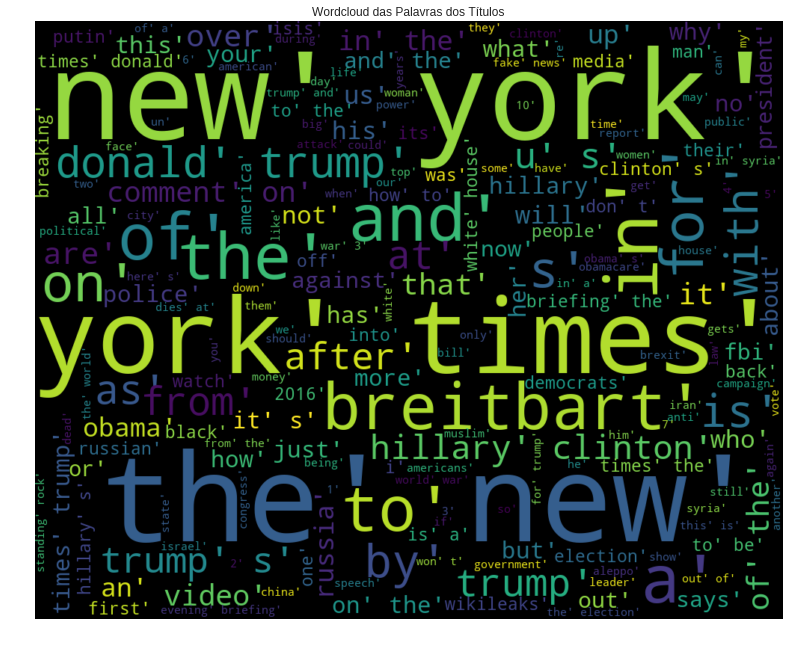

In [121]:
## Carregando a lista de stopwords
stopwords = nltk.corpus.stopwords.words('english')

## words referente a feature title
words = []
for p in train_data['title_token']:
    if p not in stopwords:
        words.append(p)

words = str(words)
            
## parametro do wordcloud
wordcloud = WordCloud(width=1000, height=800, margin=0)
wordcloud.generate(words)
    
## plotagem
plt.figure(figsize=(20,11))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0,y=0)
plt.title('Wordcloud das Palavras dos Títulos')
plt.legend()

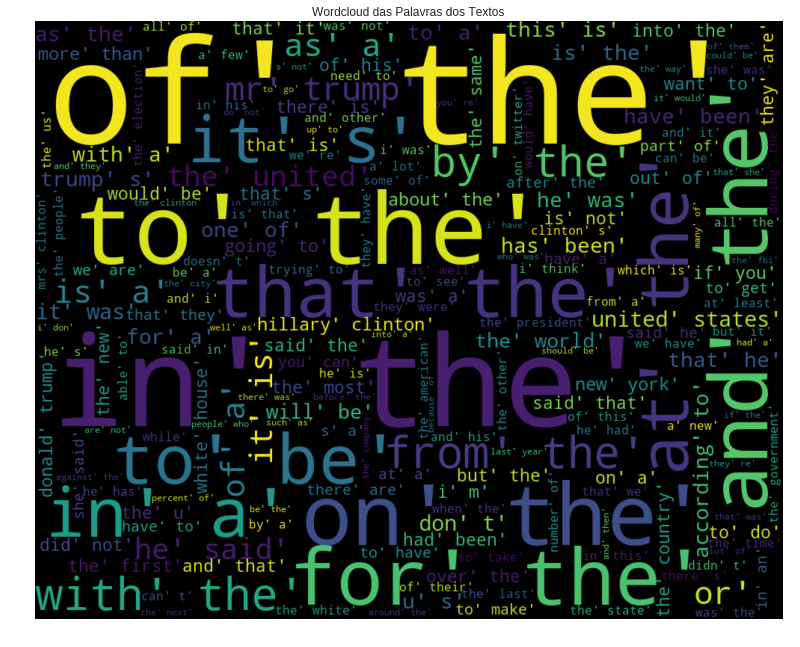

In [122]:
## Carregando a lista de stopwords
stopwords = nltk.corpus.stopwords.words('english')

## words referente a feature title
words = []
for p in train_data['text_token']:
    if p not in stopwords:
        words.append(p)

words = str(words)
            
## parametro do wordcloud
wordcloud = WordCloud(width=1000, height=800, margin=0)
wordcloud.generate(words)
    
## plotagem
plt.figure(figsize=(20,11))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0,y=0)
plt.title('Wordcloud das Palavras dos Textos')
plt.legend()

<a id='histograma'></a>
### 1.9.2 Histograma

<p>A construção de histogramas tem caráter preliminar em qualquer estudo e é um importante indicador da distribuição de dados. Neste estudo utiliza-se a frequência absoluta, que é o número que representa a quantidade de dados em uma determinada amostra ou o intervalo de classe especifico, indicando a frequência (absoluta) com que uma classe aparece no conjunto de dados.</p>
<p>A seguir, os gráficos abaixo representam os histogramas de Títulos e Textos. Estes gráficos facilitam no entendimento e na analise da existência de influência na avaliação: Confiável ou Não Confiável.</p>



In [123]:
unreliable = train_data[train_data['label'] == 1]
reliable = train_data[train_data['label'] == 0]

labels = ['Não Confiáveis','Confiáveis']
colors = ['#fb7082','#80b1d3']

<a id='histo_titulos'></a>
#### 1.9.2.1 Histograma dos Títulos

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



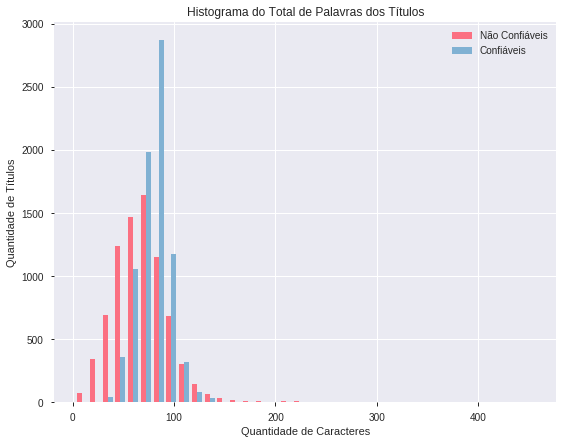

In [125]:
plt.figure(figsize=(9,7))
plt.hist([unreliable.title_comprimento,reliable.title_comprimento], bins=int(180/5), normed=False, color = colors, label=labels)
plt.xlabel('Quantidade de Caracteres')
plt.ylabel('Quantidade de Títulos')
plt.title('Histograma do Total de Palavras dos Títulos')
plt.legend()

<a id='histo_textos'></a>
#### 1.9.2.2 Histograma dos Textos

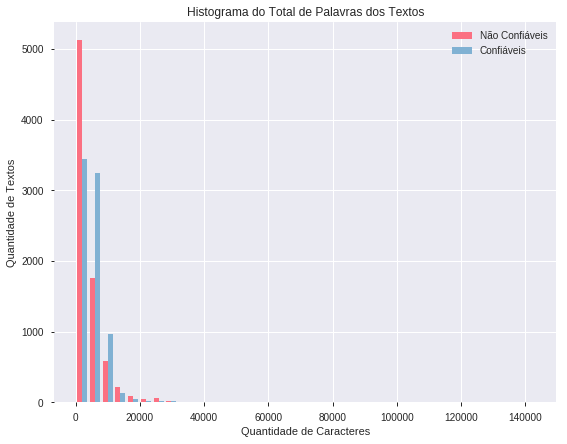

In [126]:
plt.figure(figsize=(9,7))
plt.hist([unreliable.text_comprimento,reliable.text_comprimento], bins=int(180/5), normed=False, color = colors, label=labels)
plt.xlabel('Quantidade de Caracteres')
plt.ylabel('Quantidade de Textos')
plt.title('Histograma do Total de Palavras dos Textos')
plt.legend()

<a id='boxplot'></a>
### 1.9.3 Diagrama de Caixa

O diagrama de caixa é construído utilizando as referências de valores mínimos e máximos, primeiro e terceiro quartil, mediana e os outliers da base de dados. Diferentemente do histograma que é melhor para visualização de média e desvio padrão, o diagrama de caixa têm como objetivo estudar as medidas estatística e identificar os valores atípicos dentro do conjunto de dados.

<a id='boxplot_titulo'></a>
#### 1.9.3.1 Diagrama de Caixa dos Títulos

In [127]:
confiavel = go.Box(y=reliable.title_comprimento, name = 'confiável', boxmean=True)
nao_confiavel = go.Box(y=unreliable.title_comprimento, name = 'não confiávels', boxmean=True)
data = [confiavel, nao_confiavel]
layout = go.Layout(title = "Diagrama de Caixa do Total de Palavras dos Títulos")
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

<a id='boxplot_texto'></a>
#### 1.9.3.2 Diagrama de Caixa dos Textos

In [128]:
confiavel = go.Box(y=reliable.text_comprimento, name = 'confiável', boxmean=True)
nao_confiavel = go.Box(y=unreliable.text_comprimento, name = 'não confiávels', boxmean=True)
data = [confiavel, nao_confiavel]
layout = go.Layout(title = "Diagrama de Caixa do Total de Palavras dos Textos")
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

<a id='matriz_correlacao'></a>
### 1.9.5 Matriz de correlação

In [129]:
py.init_notebook_mode(connected=True)
pd.options.mode.chained_assignment = None
np.random.seed(13)

color = sns.color_palette()
%matplotlib inline

unreliable = train_data[train_data['label'] == 1]
reliable = train_data[train_data['label'] == 0]

Com as variáveis extraídas por meio da análise por palavra, se tornou possível criar relacionamentos e identicar quais desses relacionamento se correlacionam entre si.

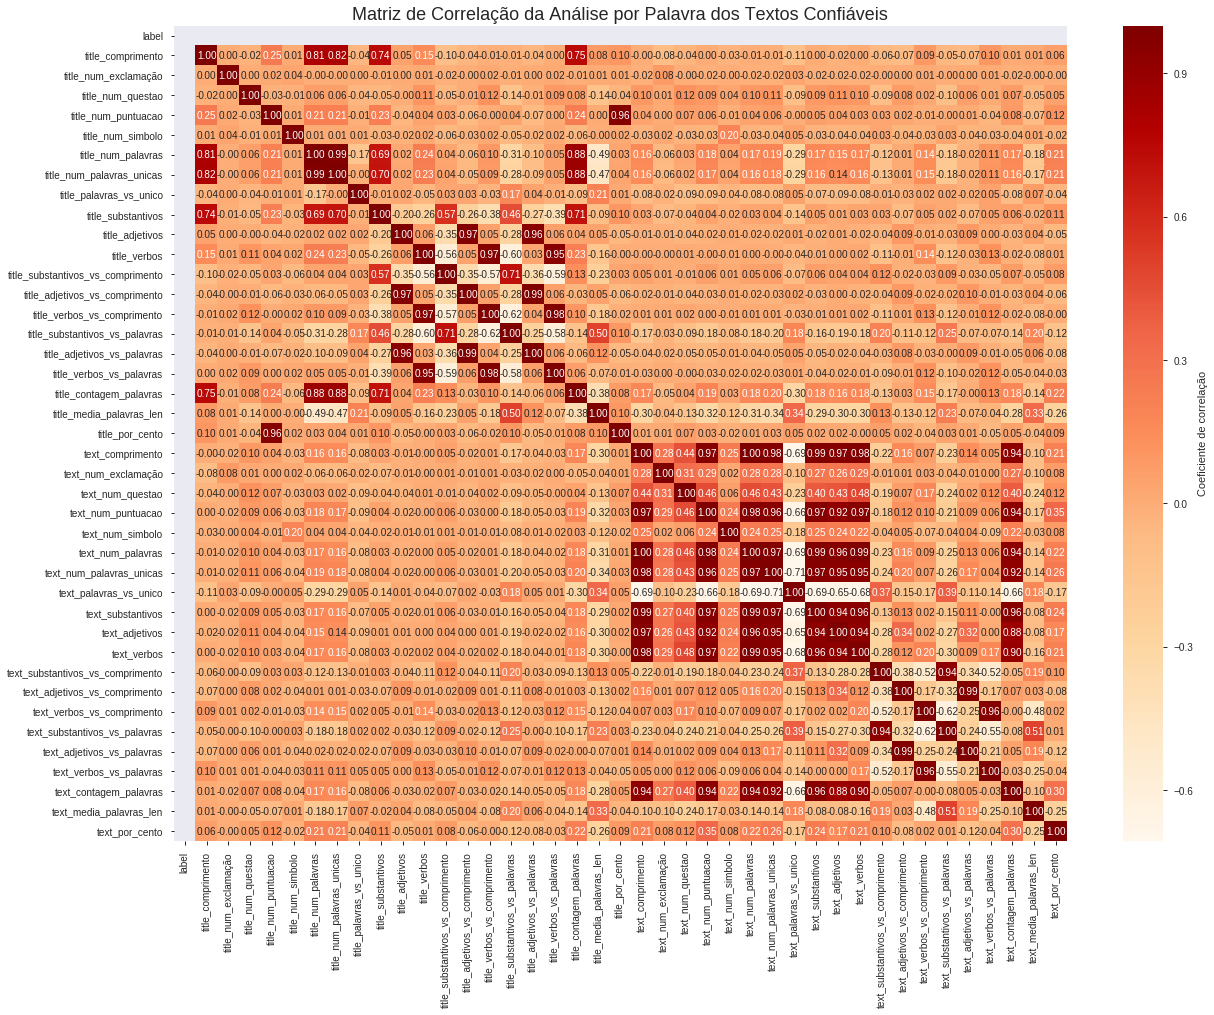

In [130]:
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(reliable.drop(['id','title'], axis=1).corr(), annot=True, fmt=".2f", ax=ax, 
            cbar_kws={'label': 'Coeficiente de correlação'}, cmap='OrRd')
ax.set_title("Matriz de Correlação da Análise por Palavra dos Textos Confiáveis", fontsize=18)
plt.show()

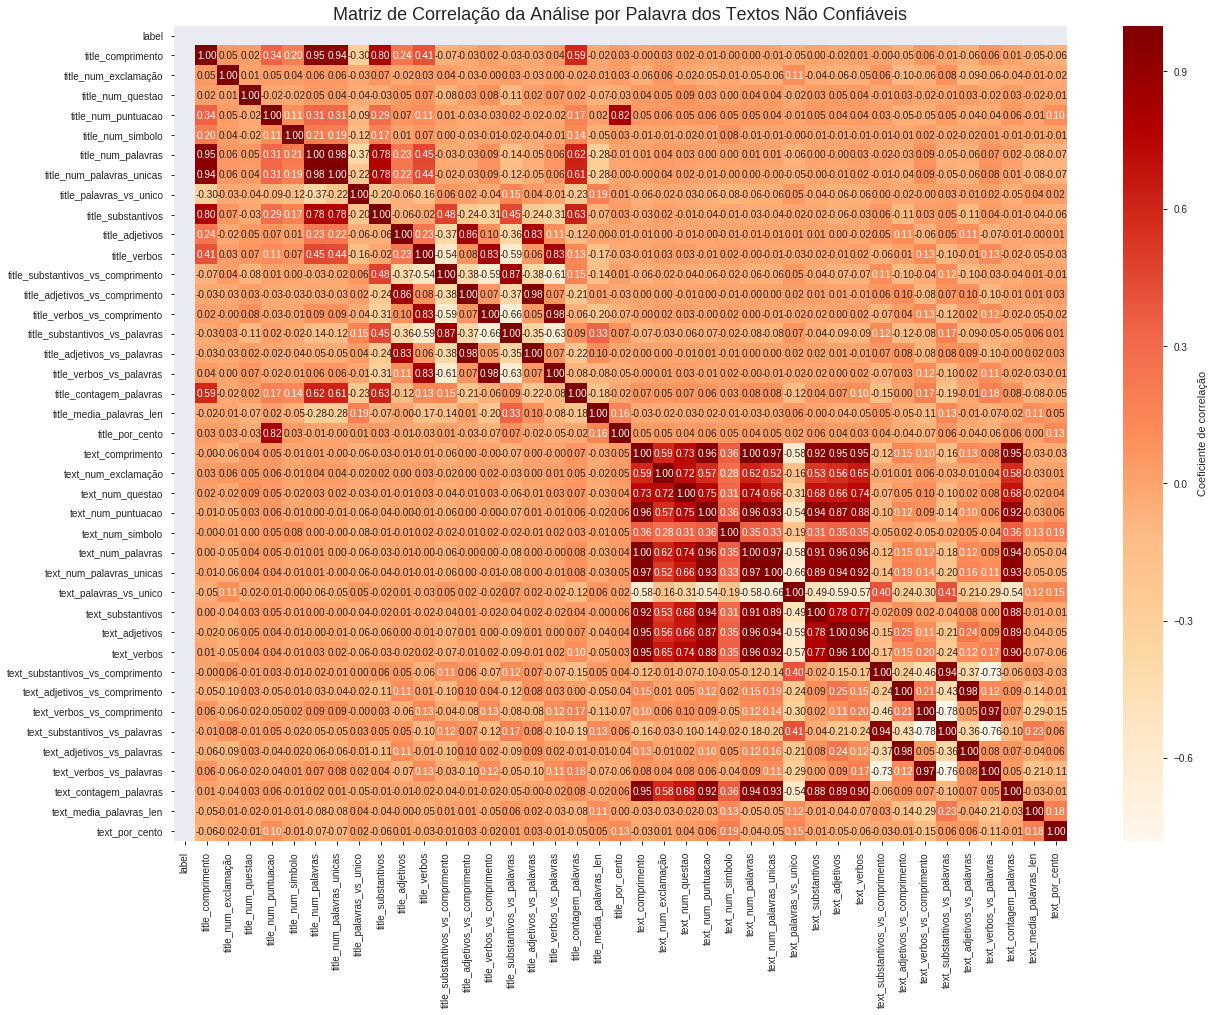

In [131]:
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(unreliable.drop(['id','title'], axis=1).corr(), annot=True, fmt=".2f", ax=ax, 
            cbar_kws={'label': 'Coeficiente de correlação'}, cmap='OrRd')
ax.set_title("Matriz de Correlação da Análise por Palavra dos Textos Não Confiáveis", fontsize=18)
plt.show()

<a id='export_csv'></a>
# 2. Exportando Dataframe Refatorado CSV:

A sáida de todos os tratamentos dos dados será utilizada na próxima etapa que será o desenvolvimento de um aprendizado de máquina com deep leraning. 

In [ ]:
train_data.to_csv ('train_refatorado.csv', index = None, header=True)

# Referências

https://www.kaggle.com/shaz13/feature-engineering-for-nlp-classification/notebook#Tagging-Parts-Of-Speech-And-More-Feature-Engineering..